In [1]:
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from matplotlib import ticker
import matplotlib.lines as mlines
from  devise.Keithley_2450 import *
import time 

In [2]:
time.sleep(0.5)

In [3]:
rm = pyvisa.ResourceManager()
# pyvisa.log_to_screen()
res = rm.list_resources(query='?*')
res
#оюрашаемся к USB узнаем устройства

('USB0::0x05E6::0x2450::04131625::INSTR',
 'TCPIP0::169.254.59.53::inst0::INSTR',
 'USB0::0x1AB1::0x04B0::DS2G171100064::0::INSTR',
 'USB0::0x1AB1::0x0640::DG5T185350021::0::INSTR',
 'USB::0x05E6::0x2450::04131625::INSTR')

In [4]:
smu = rm.open_resource(res[0])
#mso = rm.open_resource('TCPIP0::169.254.59.53::inst0::INSTR')
#mso

In [157]:
#mso.query("*IDN?")

In [108]:
mso.write('SAVE:WAVEFORM CH1,"plot4.csv"')

31

In [134]:
mso.read_termination
mso.encoding = 'ascii'
mso.read_termination = '\n'
mso.timeout = 5000

In [135]:
mso.write(":DATa:SOUrce CH1")
mso.write(":DATa:START 1")
mso.write(":DATa:STOP 10000")
mso.write(":WFMOutpre:ENCdg BINARY")
mso.write(":WFMOutpre:BYT_Nr 1")
mso.write(":HEADer 1")
mso.write(":WFMOutpre?")
mso.write(":CURVE?")

9

In [136]:
mso.write('WFMOutpre:ENCdg ASCII')
mso.write(':HEADer 0')
mso.write(':DATa:STOP 1000000')
data = mso.query_ascii_values('CURVe?', container=np.ndarray)

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [137]:
mso.encoding = 'ascii'
mso.read_termination = '\n'
mso.timeout = 5000

In [138]:
mso.write(':WAV:DATA?')
data = mso.read_raw()
data_all = data.decode('latin-1')
print(data_all)

#9000001400

In [139]:
mso.write(':BUS<n>:DATA?')

15

In [170]:
x = mso.query("DATa:SOUrce:AVAILable?")
x

VisaIOError: VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.

In [147]:
data_all = []
mso.write(':RUN')
for i in range(10):
    time.sleep(0.5)
    mso.write('WAV:SOUR CHAN1')
    mso.write(':WAV:MODE NORM')
    mso.write('WFMOutpre:ENCdg ASCII')
    mso.write(':HEADer 0')
    #mso.write(':DATa:STOP 1000000')
    mso.write(':WAV:FORM BYTE')
    data = mso.query(':WAV:DATA?')
    data_all.append(data)
mso.write(":STOP")
print(data_all)

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [120]:
# Устанавливаем режим чтения данных
mso.write(':WAV:SOUR CHAN1')  # Выбираем канал 1 для чтения данных
mso.write(':WAV:FORM BYTE')   # Устанавливаем формат данных в байтах

# Читаем данные
mso.write(':WAV:DATA?')
data = mso.read_raw()

# Обрабатываем данные
header_length = 11  # Длина заголовка данных
data = data[header_length:-1]  # Удаляем заголовок и терминатор

# Выводим данные
print(data)
decoded_data = data.decode('ASCii')  # или 'latin-1', 'utf-8', и т.д.
print(decoded_data)
# Закрываем соединение


b'\x83\x84\x83\x84\x84\x83\x83\x84\x83\x82\x82\x84\x84\x82\x83\x84\x83\x83\x83\x84\x83\x83\x83\x84\x84\x83\x82\x84\x84\x82\x83\x84\x84\x82\x83\x84\x83\x82\x82\x84\x84\x83\x83\x83\x84\x82\x82\x83\x84\x82\x82\x84\x84\x83\x82\x83\x83\x82\x82\x83\x83\x82\x82\x84\x84\x82\x82\x84\x84\x82\x83\x84\x83\x82\x83\x84\x83\x82\x82\x84\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x84\x83\x82\x82\x83\x84\x83\x83\x83\x83\x82\x82\x83\x83\x82\x82\x84\x83\x82\x83\x83\x83\x82\x82\x84\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x83\x83\x83\x82\x82\x84\x84\x82\x82\x83\x83\x83\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x82\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x84\x84\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x84\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x84\x82\x82\x83\x84\x82\x82\x84\x84\x82\x82\x84\x83\x82\x82\x83\x83\x82\x82\x83\x83\x82\x82\x83\x84\x82\x82\x83\x83\x

UnicodeDecodeError: 'ascii' codec can't decode byte 0x83 in position 0: ordinal not in range(128)

In [76]:
mso.write('WFMOutpre:ENCdg ASCII')
mso.write(':HEADer 0')
mso.write(':DATa:STOP 1000000')
data = mso.query_ascii_values('CURVe?', container=np.ndarray)

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [50]:
mso.write(':RUN')
time.sleep(3.5)
mso.write(':WAV:SOUR CHAN1')  # Выбираем канал 1 для чтения данных
mso.write(':WAV:FORM BYTE')   # Устанавливаем формат данных в байтах

# Читаем данные
mso.write(':WAV:DATA?')
data = mso.read_raw()

# Обрабатываем данные
header_length = 11  # Длина заголовка данных
data = data[header_length:-1]  # Удаляем заголовок и терминатор

# Выводим данные
print(data)
mso.write(":STOP")

b'\x9b\x9b\x9b\x9b\x9c\x9c\x9b\x9b\x9d\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9d\x9b\x9b\x9c\x9d\x9c\x9b\x9c\x9c\x9b\x9b\x9d\x9c\x9b\x9b\x9c\x9c\x9b\x9c\x9d\x9d\x9b\x9b\x9c\x9c\x9c\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9d\x9c\x9b\x9b\x9d\x9d\x9b\x9b\x9d\x9c\x9c\x9b\x9c\x9d\x9b\x9b\x9d\x9c\x9b\x9b\x9c\x9c\x9c\x9b\x9c\x9c\x9b\x9b\x9d\x9d\x9b\x9b\x9d\x9c\x9b\x9c\x9c\x9c\x9b\x9b\x9d\x9c\x9c\x9b\x9d\x9c\x9c\x9b\x9d\x9c\x9b\x9c\x9d\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9d\x9c\x9c\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9d\x9b\x9c\x9c\x9d\x9c\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9d\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9b\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9b\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9b\x9a\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9c\x9c\x9b\x9b\x9b\x

7

In [35]:
mso.write(f":dat:sou CH1")
mso.write(f":dat:start 1")
mso.write(f":dat:stop {1e4}")
mso.write(f":dat:enc ASCI")
mso.write(f":dat:width 2")
mso.write(f":header 0")
list_wf = mso.query(f"curv?").split(",")
list_wf_int = [int(x) for x in list_wf]
list_wf_int

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [5]:
def measure_current(value, compliance, sleep_time):
        smu.write("SOUR:FUNC VOLT")
        smu.write(f"SOUR:volt {value}")
        smu.write(f"SOURce:VOLT:ILIM {compliance}")
        time.sleep(sleep_time)
        I = float(smu.query(':MEASure:CURR?')) * 1000
        return I 
        
        

In [6]:
def setup_source(smu, v_range, delay):
    smu.write(f'SOUR:VOLT:RANG:AUTO OFF')
    smu.write(f'SOUR:VOLT:RANG {v_range}')
    smu.write(f'SOUR:VOLT:DEL:AUTO OFF')
    smu.write(f'SOUR:VOLT:DEL {delay}')
    

In [43]:
def get_traces(smu, buffer="defbuffer1"):
        smu.write(f':TRACe:ACTual:END? "{buffer}"')
        ending_index = int(smu.read())
        smu.write(f':TRAce:DATA? 1, {ending_index}, "{buffer}", RELative, SOURce, READing')
        result = smu.read()
        result = result.split(',')
        result = list(map(float, result))
        data = {
            'time': result[::3],
            'source': result[1::3],
            'reading': result[2::3]
        }
        return data

In [7]:

time.sleep(0.5)
I = float(smu.query(':MEASure:CURR?')) * 1000
I

-5.582919e-06

In [9]:
smu.write(f'SOUR:FUNC VOLT')
#set_voltage(self, value(значения напряжения), compliance(ограничение по току)):
#set_voltage(1, 0.1)
smu.write("OUTPut:STATe ON")
time.sleep(2.5)
I_values = []
for i in range(100):
        #measure_current(u_value, u_compliance, sleep_time_between_me):
        I = measure_current(1,0.1,0.05)
        I_values.append(I)
        print(I)
print(I_values)  
smu.write("OUTPut:STATe OFF")

0.6914971999999999
0.6914974
0.6914976
0.6914980000000001
0.6914983
0.6914975
0.6914983
0.6914979
0.6914976
0.6914987
0.6914993
0.6914990999999999
0.6915
0.6914996
0.6915006
0.6915004
0.6915005
0.6914996
0.6915003000000001
0.6915
0.6915006
0.6915011
0.6915015999999999
0.6915017
0.6915009999999999
0.6915018
0.6915018
0.6915024
0.6915021
0.6915021
0.6915018
0.6915028000000001
0.6915031
0.6915031
0.6915031
0.6915028000000001
0.6915032
0.6915032
0.6915033
0.6915028000000001
0.6915028000000001
0.6915036
0.6915032
0.6915034999999999
0.6915033
0.6915036
0.691504
0.6915038
0.6915033
0.6915038
0.6915036
0.691504
0.6915032
0.6915031
0.6915028999999999
0.6915032
0.6915031
0.6915033
0.6915031
0.6915028999999999
0.6915021
0.6915025
0.6915023
0.6915018
0.6915011
0.6915018999999999
0.6915005
0.6915008
0.6915008
0.6914998
0.6915002
0.6915006
0.6915003000000001
0.6914996999999999
0.6914994
0.6915
0.6914994
0.6914988
0.6914996
0.6914989
0.6914988
0.6914996
0.6914990000000001
0.6914990000000001
0.6914983

18

In [10]:
smu.write(f'SOUR:FUNC VOLT')
#set_voltage(self, value(значения напряжения), compliance(ограничение по току)):
#set_voltage(1, 0.1)
smu.write("OUTPut:STATe ON")
time.sleep(2.5)
I_values = []
duration = 10  # например, 10 секунд
start_time = time.time()  # Запоминаем время начала
while time.time() - start_time < duration:
    # Измеряем ток с заданными параметрами
    I = measure_current(1, 0.1, 0.05)
    I_values.append(I)
    print(I)
print(I_values)  
smu.write("OUTPut:STATe OFF")

0.6914898
0.6914910000000001
0.6914909
0.6914905
0.6914916
0.6914916
0.6914916
0.6914922
0.6914914000000001
0.6914917
0.6914920999999999
0.6914924
0.6914922
0.6914925
0.6914932
0.6914929999999999
0.6914928
0.6914929999999999
0.6914936
0.6914936
0.6914939
0.6914932
0.6914939999999999
0.6914939999999999
0.6914937
0.6914941
0.6914944
0.6914947
0.6914941
0.6914952000000001
0.6914943
0.6914954
0.691496
0.6914962
0.6914962
0.6914962
0.6914961000000001
0.6914966
0.6914964
0.6914964
0.6914964
0.6914973
0.6914965
0.6914977999999999
0.691497
0.6914971999999999
0.6914977
0.6914975
0.6914974
0.6914975
0.6914976
0.6914975
0.6914977999999999
0.691497
0.6914977999999999
0.6914983
0.6914992
0.6914988
0.6914986
0.6914990999999999
0.6914992
0.6914992
0.6914977999999999
0.6914990999999999
0.6914989
0.6914987
0.6914994
0.6914996
0.6914996
0.6914989
0.6914996999999999
0.6914992
0.6914996999999999
0.6914993
0.6914996999999999
[0.6914898, 0.6914910000000001, 0.6914909, 0.6914905, 0.6914916, 0.6914916, 0.6914

18

In [11]:
import time

smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)
I_values = []

duration = 10  # Общее время измерений в секундах
interval = 0.5  # Интервал между измерениями в секундах
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    I = measure_current(1, 0.1, 0.05)
    I_values.append(I)
    print(I)
    # Ждем оставшееся время до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

print(I_values)
smu.write("OUTPut:STATe OFF")


0.6914939
0.6914939
0.6914944
0.6914943
0.6914936
0.6914939
0.6914935
0.6914937
0.6914941
0.6914939
0.6914944
0.691496
0.6914958
0.6914965
0.6914966
0.6914958
0.6914962
0.6914965
0.691496
0.6914969
[0.6914939, 0.6914939, 0.6914944, 0.6914943, 0.6914936, 0.6914939, 0.6914935, 0.6914937, 0.6914941, 0.6914939, 0.6914944, 0.691496, 0.6914958, 0.6914965, 0.6914966, 0.6914958, 0.6914962, 0.6914965, 0.691496, 0.6914969]


18

Time: 0.00s, Current: 1.4457929999999999
Time: 0.50s, Current: 1.445806
Time: 1.00s, Current: 1.445832
Time: 1.50s, Current: 1.445863
Time: 2.00s, Current: 1.445889
Time: 2.51s, Current: 1.445897
Time: 3.01s, Current: 1.445891
Time: 3.51s, Current: 1.445869
Time: 4.01s, Current: 1.445831
Time: 4.51s, Current: 1.445778
Time: 5.01s, Current: 1.445717
Time: 5.51s, Current: 1.445643
Time: 6.01s, Current: 1.4455609999999999
Time: 6.51s, Current: 1.445465
Time: 7.01s, Current: 1.445372
Time: 7.52s, Current: 1.445267
Time: 8.02s, Current: 1.445151
Time: 8.52s, Current: 1.445033
Time: 9.02s, Current: 1.4449079999999999
Time: 9.52s, Current: 1.444781
Time: 10.02s, Current: 1.4446420000000002
Time: 10.52s, Current: 1.4445020000000002
Time: 11.02s, Current: 1.444352
Time: 11.52s, Current: 1.4442030000000001
Time: 12.02s, Current: 1.444045
Time: 12.53s, Current: 1.4438840000000002
Time: 13.03s, Current: 1.443721
Time: 13.53s, Current: 1.4435520000000002
Time: 14.03s, Current: 1.443379
Time: 14.53s

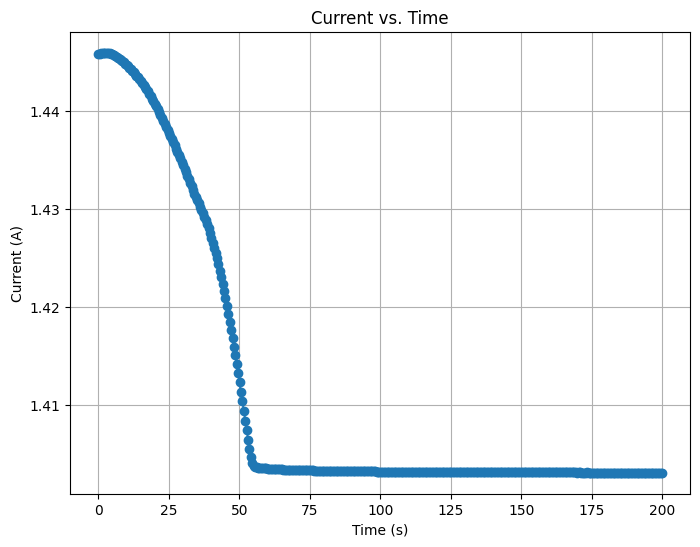

In [177]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)

# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 200  # Total measurement time in seconds
interval = 0.5  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(1, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

Time: 0.00s, Current: 4.578771
Time: 0.81s, Current: 4.579004
Time: 1.31s, Current: 4.578423
Time: 1.81s, Current: 4.577549


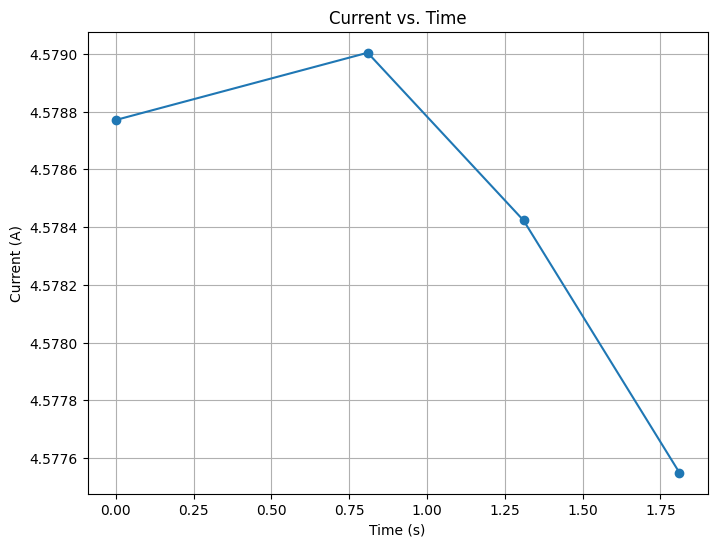

In [8]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")

# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 200  # Total measurement time in seconds
interval = 0.5  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(5, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)


smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

In [33]:
import time
import matplotlib.pyplot as plt
import pandas as pd  # убедитесь, что pandas импортирован
from matplotlib.ticker import FuncFormatter

# Инициализация SMU (Источник-Измеритель)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)
%matplotlib inline
# Инициализация списков для хранения значений тока и времени
I_values = []
t_values = []

interval = 0.1  # Интервал между измерениями в секундах

# Первый цикл измерений
duration1 = 5  # Длительность первого цикла измерений в секундах
start_time = time.time()

while time.time() - start_time < duration1:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Время с начала измерений
    
    # Измерение тока с первыми параметрами
    I = measure_current(4, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Ожидание до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

# Второй цикл измерений с другими параметрами
duration2 = 5  # Длительность второго цикла измерений в секундах
second_start_time = time.time()

while time.time() - second_start_time < duration2:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Используем начальное время первого цикла для непрерывности времени
    
    # Измерение тока с вторыми параметрами (замените на нужные)
    I = measure_current(3, 0.01, 1)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Ожидание до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

# Отключение выхода SMU
smu.write("OUTPut:STATe OFF")

# Построение графика ток-время
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()


VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).

Time: 0.00s, Current: 0.01435917
Time: 0.50s, Current: 0.014361929999999998
Time: 1.00s, Current: 0.01436633
Time: 1.50s, Current: 0.01436968
Time: 2.00s, Current: 0.0143741
Time: 2.50s, Current: 0.01437831
Time: 3.01s, Current: 0.01438235
Time: 3.51s, Current: 0.01438584
Time: 4.01s, Current: 0.014389279999999999
Time: 4.51s, Current: 0.014392480000000001
Time: 5.01s, Current: 0.01439602
Time: 5.51s, Current: 0.014399229999999999
Time: 6.01s, Current: 0.01440248
Time: 6.51s, Current: 0.01440537
Time: 7.01s, Current: 0.014408259999999999
Time: 7.52s, Current: 0.01441059
Time: 8.02s, Current: 0.01441376
Time: 8.52s, Current: 0.01441694
Time: 9.02s, Current: 0.01441856
Time: 9.52s, Current: 0.014420460000000001
Time: 10.02s, Current: 0.014423140000000001
Time: 10.52s, Current: 0.0144253
Time: 11.02s, Current: 0.014427559999999999
Time: 11.53s, Current: 0.014428960000000001
Time: 12.03s, Current: 0.01443132
Time: 12.53s, Current: 0.01443382
Time: 13.03s, Current: 0.01443502
Time: 13.53s, 

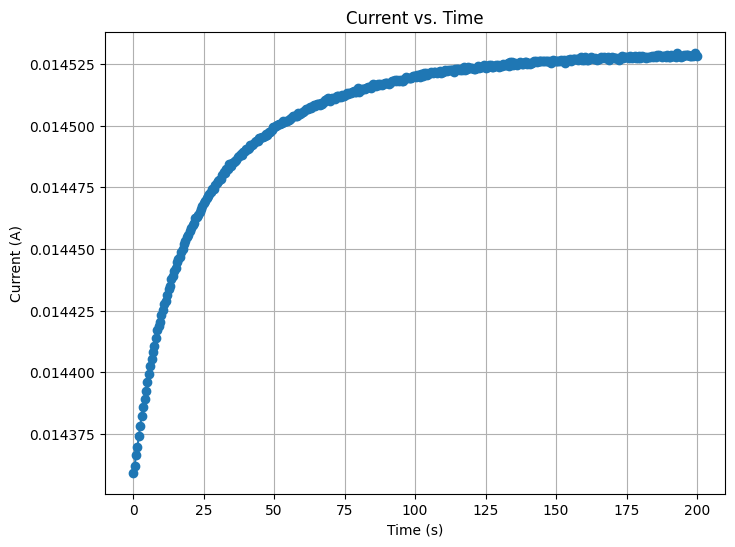

In [26]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)

# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 200  # Total measurement time in seconds
interval = 0.5  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(0.01, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

Time: 0.00s, Current: 0.4597663
Time: 0.50s, Current: 0.4597677
Time: 1.00s, Current: 0.4597682
Time: 1.50s, Current: 0.4597677
Time: 2.00s, Current: 0.4597675
Time: 2.51s, Current: 0.459767
Time: 3.01s, Current: 0.4597671
Time: 3.51s, Current: 0.4597661
Time: 4.01s, Current: 0.4597654
Time: 4.51s, Current: 0.4597657
Time: 5.01s, Current: 0.45976619999999996
Time: 5.51s, Current: 0.4597657
Time: 6.01s, Current: 0.4597656
Time: 6.51s, Current: 0.45976619999999996
Time: 7.02s, Current: 0.4597658
Time: 7.52s, Current: 0.4597647
Time: 8.02s, Current: 0.4597646
Time: 8.52s, Current: 0.45976330000000004
Time: 9.02s, Current: 0.4597626
Time: 9.52s, Current: 0.4597616
Time: 10.02s, Current: 0.459761
Time: 10.52s, Current: 0.4597603
Time: 11.02s, Current: 0.4597599
Time: 11.52s, Current: 0.4597598
Time: 12.03s, Current: 0.4597594
Time: 12.53s, Current: 0.45975889999999997
Time: 13.03s, Current: 0.4597587
Time: 13.53s, Current: 0.4597584
Time: 14.03s, Current: 0.4597591
Time: 14.53s, Current: 0.

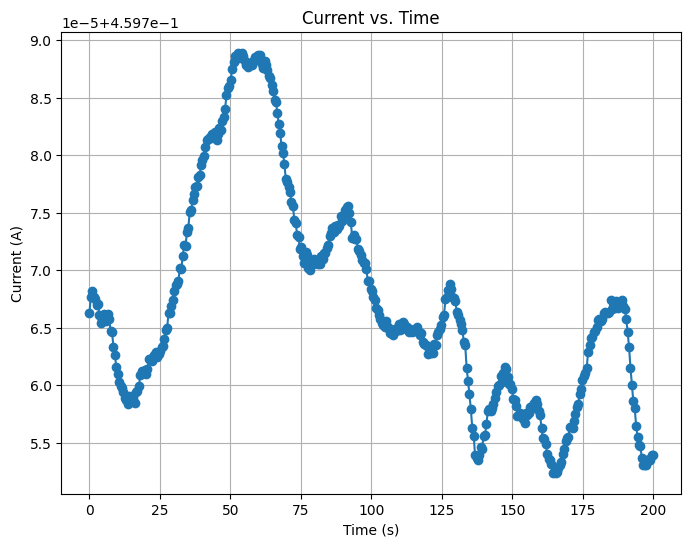

In [10]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)

# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 200  # Total measurement time in seconds
interval = 0.5  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(1, 0.001, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

Time: 0.02s, Current: 0.45975669999999996


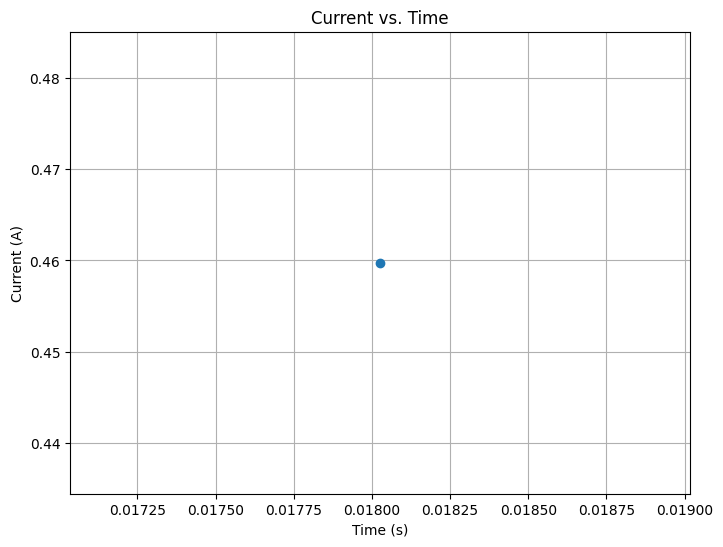

Time: 0.52s, Current: 0.4597577


<Figure size 640x480 with 0 Axes>

Time: 1.02s, Current: 0.459758


<Figure size 640x480 with 0 Axes>

Time: 1.52s, Current: 0.4597578


<Figure size 640x480 with 0 Axes>

Time: 2.02s, Current: 0.4597588


<Figure size 640x480 with 0 Axes>

Time: 2.52s, Current: 0.4597598


<Figure size 640x480 with 0 Axes>

Time: 3.02s, Current: 0.45975950000000004


<Figure size 640x480 with 0 Axes>

Time: 3.52s, Current: 0.4597601


<Figure size 640x480 with 0 Axes>

Time: 4.02s, Current: 0.4597599


<Figure size 640x480 with 0 Axes>

Time: 4.52s, Current: 0.459761


<Figure size 640x480 with 0 Axes>

Time: 5.02s, Current: 0.4597616


<Figure size 640x480 with 0 Axes>

Time: 5.52s, Current: 0.4597623


<Figure size 640x480 with 0 Axes>

Time: 6.02s, Current: 0.4597622


<Figure size 640x480 with 0 Axes>

Time: 6.52s, Current: 0.4597622


<Figure size 640x480 with 0 Axes>

Time: 7.02s, Current: 0.459762


<Figure size 640x480 with 0 Axes>

Time: 7.52s, Current: 0.4597618


<Figure size 640x480 with 0 Axes>

Time: 8.03s, Current: 0.45976189999999995


<Figure size 640x480 with 0 Axes>

Time: 8.53s, Current: 0.4597626


<Figure size 640x480 with 0 Axes>

Time: 9.03s, Current: 0.4597629


<Figure size 640x480 with 0 Axes>

Time: 9.53s, Current: 0.45976330000000004


<Figure size 640x480 with 0 Axes>

Time: 10.03s, Current: 0.4597637


<Figure size 640x480 with 0 Axes>

Time: 10.53s, Current: 0.45976449999999996


<Figure size 640x480 with 0 Axes>

Time: 11.03s, Current: 0.45976449999999996


<Figure size 640x480 with 0 Axes>

Time: 11.53s, Current: 0.45976520000000004


<Figure size 640x480 with 0 Axes>

Time: 12.03s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 12.53s, Current: 0.4597658


<Figure size 640x480 with 0 Axes>

Time: 13.03s, Current: 0.4597663


<Figure size 640x480 with 0 Axes>

Time: 13.53s, Current: 0.45976680000000003


<Figure size 640x480 with 0 Axes>

Time: 14.03s, Current: 0.4597671


<Figure size 640x480 with 0 Axes>

Time: 14.53s, Current: 0.4597677


<Figure size 640x480 with 0 Axes>

Time: 15.03s, Current: 0.45976859999999997


<Figure size 640x480 with 0 Axes>

Time: 15.53s, Current: 0.4597685


<Figure size 640x480 with 0 Axes>

Time: 16.03s, Current: 0.4597693


<Figure size 640x480 with 0 Axes>

Time: 16.53s, Current: 0.4597698


<Figure size 640x480 with 0 Axes>

Time: 17.03s, Current: 0.45977080000000004


<Figure size 640x480 with 0 Axes>

Time: 17.53s, Current: 0.4597712


<Figure size 640x480 with 0 Axes>

Time: 18.03s, Current: 0.45977110000000004


<Figure size 640x480 with 0 Axes>

Time: 18.53s, Current: 0.4597723


<Figure size 640x480 with 0 Axes>

Time: 19.03s, Current: 0.4597715


<Figure size 640x480 with 0 Axes>

Time: 19.54s, Current: 0.4597722


<Figure size 640x480 with 0 Axes>

Time: 20.04s, Current: 0.4597726


<Figure size 640x480 with 0 Axes>

Time: 20.54s, Current: 0.45977209999999996


<Figure size 640x480 with 0 Axes>

Time: 21.04s, Current: 0.4597715


<Figure size 640x480 with 0 Axes>

Time: 21.54s, Current: 0.45977049999999997


<Figure size 640x480 with 0 Axes>

Time: 22.04s, Current: 0.4597701


<Figure size 640x480 with 0 Axes>

Time: 22.54s, Current: 0.4597701


<Figure size 640x480 with 0 Axes>

Time: 23.04s, Current: 0.459769


<Figure size 640x480 with 0 Axes>

Time: 23.54s, Current: 0.4597693


<Figure size 640x480 with 0 Axes>

Time: 24.04s, Current: 0.4597693


<Figure size 640x480 with 0 Axes>

Time: 24.54s, Current: 0.4597688


<Figure size 640x480 with 0 Axes>

Time: 25.04s, Current: 0.45976829999999996


<Figure size 640x480 with 0 Axes>

Time: 25.54s, Current: 0.459768


<Figure size 640x480 with 0 Axes>

Time: 26.04s, Current: 0.4597682


<Figure size 640x480 with 0 Axes>

Time: 26.54s, Current: 0.4597679


<Figure size 640x480 with 0 Axes>

Time: 27.04s, Current: 0.45976809999999996


<Figure size 640x480 with 0 Axes>

Time: 27.54s, Current: 0.4597676


<Figure size 640x480 with 0 Axes>

Time: 28.04s, Current: 0.4597676


<Figure size 640x480 with 0 Axes>

Time: 28.54s, Current: 0.459768


<Figure size 640x480 with 0 Axes>

Time: 29.04s, Current: 0.4597672


<Figure size 640x480 with 0 Axes>

Time: 29.54s, Current: 0.4597678


<Figure size 640x480 with 0 Axes>

Time: 30.04s, Current: 0.4597674


<Figure size 640x480 with 0 Axes>

Time: 30.54s, Current: 0.4597674


<Figure size 640x480 with 0 Axes>

Time: 31.04s, Current: 0.4597669


<Figure size 640x480 with 0 Axes>

Time: 31.55s, Current: 0.4597677


<Figure size 640x480 with 0 Axes>

Time: 32.05s, Current: 0.45976809999999996


<Figure size 640x480 with 0 Axes>

Time: 32.55s, Current: 0.45976859999999997


<Figure size 640x480 with 0 Axes>

Time: 33.05s, Current: 0.45976859999999997


<Figure size 640x480 with 0 Axes>

Time: 33.55s, Current: 0.4597694


<Figure size 640x480 with 0 Axes>

Time: 34.05s, Current: 0.4597694


<Figure size 640x480 with 0 Axes>

Time: 34.55s, Current: 0.4597701


<Figure size 640x480 with 0 Axes>

Time: 35.05s, Current: 0.45977080000000004


<Figure size 640x480 with 0 Axes>

Time: 35.55s, Current: 0.4597714


<Figure size 640x480 with 0 Axes>

Time: 36.05s, Current: 0.459772


<Figure size 640x480 with 0 Axes>

Time: 36.55s, Current: 0.45977270000000003


<Figure size 640x480 with 0 Axes>

Time: 37.05s, Current: 0.4597728


<Figure size 640x480 with 0 Axes>

Time: 37.55s, Current: 0.4597731


<Figure size 640x480 with 0 Axes>

Time: 38.05s, Current: 0.4597736


<Figure size 640x480 with 0 Axes>

Time: 38.55s, Current: 0.45977460000000003


<Figure size 640x480 with 0 Axes>

Time: 39.05s, Current: 0.4597747


<Figure size 640x480 with 0 Axes>

Time: 39.55s, Current: 0.4597747


<Figure size 640x480 with 0 Axes>

Time: 40.05s, Current: 0.459775


<Figure size 640x480 with 0 Axes>

Time: 40.55s, Current: 0.4597748


<Figure size 640x480 with 0 Axes>

Time: 41.05s, Current: 0.4597741


<Figure size 640x480 with 0 Axes>

Time: 41.55s, Current: 0.45977460000000003


<Figure size 640x480 with 0 Axes>

Time: 42.05s, Current: 0.45977419999999997


<Figure size 640x480 with 0 Axes>

Time: 42.55s, Current: 0.45977399999999996


<Figure size 640x480 with 0 Axes>

Time: 43.05s, Current: 0.4597738


<Figure size 640x480 with 0 Axes>

Time: 43.55s, Current: 0.45977399999999996


<Figure size 640x480 with 0 Axes>

Time: 44.05s, Current: 0.4597738


<Figure size 640x480 with 0 Axes>

Time: 44.55s, Current: 0.4597733


<Figure size 640x480 with 0 Axes>

Time: 45.05s, Current: 0.4597738


<Figure size 640x480 with 0 Axes>

Time: 45.55s, Current: 0.45977419999999997


<Figure size 640x480 with 0 Axes>

Time: 46.05s, Current: 0.45977419999999997


<Figure size 640x480 with 0 Axes>

Time: 46.56s, Current: 0.45977460000000003


<Figure size 640x480 with 0 Axes>

Time: 47.06s, Current: 0.459775


<Figure size 640x480 with 0 Axes>

Time: 47.56s, Current: 0.4597754


<Figure size 640x480 with 0 Axes>

Time: 48.06s, Current: 0.45977589999999996


<Figure size 640x480 with 0 Axes>

Time: 48.56s, Current: 0.45977609999999997


<Figure size 640x480 with 0 Axes>

Time: 49.06s, Current: 0.4597767


<Figure size 640x480 with 0 Axes>

Time: 49.56s, Current: 0.45977700000000005


<Figure size 640x480 with 0 Axes>

Time: 50.06s, Current: 0.4597774


<Figure size 640x480 with 0 Axes>

Time: 50.56s, Current: 0.4597772


<Figure size 640x480 with 0 Axes>

Time: 51.06s, Current: 0.4597775


<Figure size 640x480 with 0 Axes>

Time: 51.56s, Current: 0.4597779


<Figure size 640x480 with 0 Axes>

Time: 52.06s, Current: 0.45977779999999996


<Figure size 640x480 with 0 Axes>

Time: 52.56s, Current: 0.4597783


<Figure size 640x480 with 0 Axes>

Time: 53.06s, Current: 0.45977840000000003


<Figure size 640x480 with 0 Axes>

Time: 53.56s, Current: 0.45977840000000003


<Figure size 640x480 with 0 Axes>

Time: 54.06s, Current: 0.45977890000000005


<Figure size 640x480 with 0 Axes>

Time: 54.56s, Current: 0.459779


<Figure size 640x480 with 0 Axes>

Time: 55.06s, Current: 0.45977890000000005


<Figure size 640x480 with 0 Axes>

Time: 55.56s, Current: 0.4597788


<Figure size 640x480 with 0 Axes>

Time: 56.06s, Current: 0.45978030000000003


<Figure size 640x480 with 0 Axes>

Time: 56.56s, Current: 0.4597782


<Figure size 640x480 with 0 Axes>

Time: 57.06s, Current: 0.4597788


<Figure size 640x480 with 0 Axes>

Time: 57.56s, Current: 0.4597781


<Figure size 640x480 with 0 Axes>

Time: 58.06s, Current: 0.4597775


<Figure size 640x480 with 0 Axes>

Time: 58.56s, Current: 0.4597764


<Figure size 640x480 with 0 Axes>

Time: 59.06s, Current: 0.45977609999999997


<Figure size 640x480 with 0 Axes>

Time: 59.56s, Current: 0.459775


<Figure size 640x480 with 0 Axes>

Time: 60.06s, Current: 0.4597744


<Figure size 640x480 with 0 Axes>

Time: 60.56s, Current: 0.4597736


<Figure size 640x480 with 0 Axes>

Time: 61.07s, Current: 0.4597733


<Figure size 640x480 with 0 Axes>

Time: 61.57s, Current: 0.4597729


<Figure size 640x480 with 0 Axes>

Time: 62.07s, Current: 0.4597733


<Figure size 640x480 with 0 Axes>

Time: 62.57s, Current: 0.4597729


<Figure size 640x480 with 0 Axes>

Time: 63.07s, Current: 0.45977300000000004


<Figure size 640x480 with 0 Axes>

Time: 63.57s, Current: 0.4597734


<Figure size 640x480 with 0 Axes>

Time: 64.07s, Current: 0.45977300000000004


<Figure size 640x480 with 0 Axes>

Time: 64.57s, Current: 0.4597731


<Figure size 640x480 with 0 Axes>

Time: 65.07s, Current: 0.4597736


<Figure size 640x480 with 0 Axes>

Time: 65.57s, Current: 0.4597737


<Figure size 640x480 with 0 Axes>

Time: 66.07s, Current: 0.4597739


<Figure size 640x480 with 0 Axes>

Time: 66.57s, Current: 0.4597744


<Figure size 640x480 with 0 Axes>

Time: 67.07s, Current: 0.4597748


<Figure size 640x480 with 0 Axes>

Time: 67.57s, Current: 0.459775


<Figure size 640x480 with 0 Axes>

Time: 68.07s, Current: 0.4597752


<Figure size 640x480 with 0 Axes>

Time: 68.57s, Current: 0.459775


<Figure size 640x480 with 0 Axes>

Time: 69.07s, Current: 0.4597753


<Figure size 640x480 with 0 Axes>

Time: 69.57s, Current: 0.4597762


<Figure size 640x480 with 0 Axes>

Time: 70.07s, Current: 0.4597764


<Figure size 640x480 with 0 Axes>

Time: 70.57s, Current: 0.4597766


<Figure size 640x480 with 0 Axes>

Time: 71.07s, Current: 0.4597767


<Figure size 640x480 with 0 Axes>

Time: 71.57s, Current: 0.4597772


<Figure size 640x480 with 0 Axes>

Time: 72.07s, Current: 0.45977700000000005


<Figure size 640x480 with 0 Axes>

Time: 72.57s, Current: 0.4597782


<Figure size 640x480 with 0 Axes>

Time: 73.07s, Current: 0.4597786


<Figure size 640x480 with 0 Axes>

Time: 73.57s, Current: 0.4597793


<Figure size 640x480 with 0 Axes>

Time: 74.07s, Current: 0.4597796


<Figure size 640x480 with 0 Axes>

Time: 74.57s, Current: 0.4597804


<Figure size 640x480 with 0 Axes>

Time: 75.07s, Current: 0.4597816


<Figure size 640x480 with 0 Axes>

Time: 75.58s, Current: 0.4597816


<Figure size 640x480 with 0 Axes>

Time: 76.08s, Current: 0.459782


<Figure size 640x480 with 0 Axes>

Time: 76.58s, Current: 0.4597823


<Figure size 640x480 with 0 Axes>

Time: 77.08s, Current: 0.4597825


<Figure size 640x480 with 0 Axes>

Time: 77.58s, Current: 0.4597834


<Figure size 640x480 with 0 Axes>

Time: 78.08s, Current: 0.45978369999999996


<Figure size 640x480 with 0 Axes>

Time: 78.58s, Current: 0.4597844


<Figure size 640x480 with 0 Axes>

Time: 79.08s, Current: 0.4597849


<Figure size 640x480 with 0 Axes>

Time: 79.58s, Current: 0.4597857


<Figure size 640x480 with 0 Axes>

Time: 80.08s, Current: 0.45978600000000003


<Figure size 640x480 with 0 Axes>

Time: 80.58s, Current: 0.45978579999999997


<Figure size 640x480 with 0 Axes>

Time: 81.08s, Current: 0.45978620000000003


<Figure size 640x480 with 0 Axes>

Time: 81.58s, Current: 0.4597859


<Figure size 640x480 with 0 Axes>

Time: 82.08s, Current: 0.4597869


<Figure size 640x480 with 0 Axes>

Time: 82.58s, Current: 0.4597867


<Figure size 640x480 with 0 Axes>

Time: 83.08s, Current: 0.459787


<Figure size 640x480 with 0 Axes>

Time: 83.58s, Current: 0.4597869


<Figure size 640x480 with 0 Axes>

Time: 84.08s, Current: 0.4597867


<Figure size 640x480 with 0 Axes>

Time: 84.58s, Current: 0.4597865


<Figure size 640x480 with 0 Axes>

Time: 85.08s, Current: 0.4597866


<Figure size 640x480 with 0 Axes>

Time: 85.58s, Current: 0.45978600000000003


<Figure size 640x480 with 0 Axes>

Time: 86.08s, Current: 0.4597855


<Figure size 640x480 with 0 Axes>

Time: 86.58s, Current: 0.4597859


<Figure size 640x480 with 0 Axes>

Time: 87.08s, Current: 0.4597855


<Figure size 640x480 with 0 Axes>

Time: 87.59s, Current: 0.4597848


<Figure size 640x480 with 0 Axes>

Time: 88.09s, Current: 0.4597849


<Figure size 640x480 with 0 Axes>

Time: 88.59s, Current: 0.4597844


<Figure size 640x480 with 0 Axes>

Time: 89.09s, Current: 0.4597836


<Figure size 640x480 with 0 Axes>

Time: 89.59s, Current: 0.45978369999999996


<Figure size 640x480 with 0 Axes>

Time: 90.09s, Current: 0.4597823


<Figure size 640x480 with 0 Axes>

Time: 90.59s, Current: 0.4597819


<Figure size 640x480 with 0 Axes>

Time: 91.09s, Current: 0.45978080000000005


<Figure size 640x480 with 0 Axes>

Time: 91.59s, Current: 0.4597807


<Figure size 640x480 with 0 Axes>

Time: 92.09s, Current: 0.4597796


<Figure size 640x480 with 0 Axes>

Time: 92.59s, Current: 0.4597791


<Figure size 640x480 with 0 Axes>

Time: 93.09s, Current: 0.45977840000000003


<Figure size 640x480 with 0 Axes>

Time: 93.59s, Current: 0.4597786


<Figure size 640x480 with 0 Axes>

Time: 94.09s, Current: 0.45977840000000003


<Figure size 640x480 with 0 Axes>

Time: 94.59s, Current: 0.4597777


<Figure size 640x480 with 0 Axes>

Time: 95.09s, Current: 0.4597775


<Figure size 640x480 with 0 Axes>

Time: 95.59s, Current: 0.45977700000000005


<Figure size 640x480 with 0 Axes>

Time: 96.09s, Current: 0.4597758


<Figure size 640x480 with 0 Axes>

Time: 96.59s, Current: 0.45977490000000004


<Figure size 640x480 with 0 Axes>

Time: 97.10s, Current: 0.4597741


<Figure size 640x480 with 0 Axes>

Time: 97.60s, Current: 0.4597738


<Figure size 640x480 with 0 Axes>

Time: 98.12s, Current: 0.4597726


<Figure size 640x480 with 0 Axes>

Time: 98.62s, Current: 0.45977209999999996


<Figure size 640x480 with 0 Axes>

Time: 99.12s, Current: 0.4597713


<Figure size 640x480 with 0 Axes>

Time: 99.63s, Current: 0.4597701


<Figure size 640x480 with 0 Axes>

Time: 100.13s, Current: 0.45977


<Figure size 640x480 with 0 Axes>

Time: 100.63s, Current: 0.459769


<Figure size 640x480 with 0 Axes>

Time: 101.13s, Current: 0.4597688


<Figure size 640x480 with 0 Axes>

Time: 101.63s, Current: 0.45976859999999997


<Figure size 640x480 with 0 Axes>

Time: 102.13s, Current: 0.45976829999999996


<Figure size 640x480 with 0 Axes>

Time: 102.63s, Current: 0.4597676


<Figure size 640x480 with 0 Axes>

Time: 103.13s, Current: 0.4597671


<Figure size 640x480 with 0 Axes>

Time: 103.63s, Current: 0.45976730000000005


<Figure size 640x480 with 0 Axes>

Time: 104.13s, Current: 0.4597667


<Figure size 640x480 with 0 Axes>

Time: 104.63s, Current: 0.4597666


<Figure size 640x480 with 0 Axes>

Time: 105.13s, Current: 0.4597667


<Figure size 640x480 with 0 Axes>

Time: 105.63s, Current: 0.4597658


<Figure size 640x480 with 0 Axes>

Time: 106.13s, Current: 0.4597658


<Figure size 640x480 with 0 Axes>

Time: 106.63s, Current: 0.4597667


<Figure size 640x480 with 0 Axes>

Time: 107.13s, Current: 0.4597666


<Figure size 640x480 with 0 Axes>

Time: 107.63s, Current: 0.4597666


<Figure size 640x480 with 0 Axes>

Time: 108.13s, Current: 0.4597678


<Figure size 640x480 with 0 Axes>

Time: 108.63s, Current: 0.4597679


<Figure size 640x480 with 0 Axes>

Time: 109.13s, Current: 0.45976859999999997


<Figure size 640x480 with 0 Axes>

Time: 109.63s, Current: 0.459768


<Figure size 640x480 with 0 Axes>

Time: 110.13s, Current: 0.4597695


<Figure size 640x480 with 0 Axes>

Time: 110.63s, Current: 0.4597694


<Figure size 640x480 with 0 Axes>

Time: 111.13s, Current: 0.4597693


<Figure size 640x480 with 0 Axes>

Time: 111.63s, Current: 0.4597693


<Figure size 640x480 with 0 Axes>

Time: 112.13s, Current: 0.45976870000000003


<Figure size 640x480 with 0 Axes>

Time: 112.63s, Current: 0.4597685


<Figure size 640x480 with 0 Axes>

Time: 113.13s, Current: 0.45976829999999996


<Figure size 640x480 with 0 Axes>

Time: 113.63s, Current: 0.45976829999999996


<Figure size 640x480 with 0 Axes>

Time: 114.13s, Current: 0.4597675


<Figure size 640x480 with 0 Axes>

Time: 114.63s, Current: 0.4597669


<Figure size 640x480 with 0 Axes>

Time: 115.13s, Current: 0.45976619999999996


<Figure size 640x480 with 0 Axes>

Time: 115.63s, Current: 0.4597655


<Figure size 640x480 with 0 Axes>

Time: 116.13s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 116.63s, Current: 0.4597642


<Figure size 640x480 with 0 Axes>

Time: 117.13s, Current: 0.4597641


<Figure size 640x480 with 0 Axes>

Time: 117.63s, Current: 0.4597639


<Figure size 640x480 with 0 Axes>

Time: 118.14s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 118.64s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 119.14s, Current: 0.45976449999999996


<Figure size 640x480 with 0 Axes>

Time: 119.64s, Current: 0.4597648


<Figure size 640x480 with 0 Axes>

Time: 120.14s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 120.64s, Current: 0.459765


<Figure size 640x480 with 0 Axes>

Time: 121.14s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 121.64s, Current: 0.4597661


<Figure size 640x480 with 0 Axes>

Time: 122.14s, Current: 0.45976639999999996


<Figure size 640x480 with 0 Axes>

Time: 122.64s, Current: 0.4597667


<Figure size 640x480 with 0 Axes>

Time: 123.14s, Current: 0.45976680000000003


<Figure size 640x480 with 0 Axes>

Time: 123.64s, Current: 0.4597672


<Figure size 640x480 with 0 Axes>

Time: 124.14s, Current: 0.4597677


<Figure size 640x480 with 0 Axes>

Time: 124.64s, Current: 0.4597682


<Figure size 640x480 with 0 Axes>

Time: 125.14s, Current: 0.4597674


<Figure size 640x480 with 0 Axes>

Time: 125.64s, Current: 0.4597679


<Figure size 640x480 with 0 Axes>

Time: 126.14s, Current: 0.4597676


<Figure size 640x480 with 0 Axes>

Time: 126.64s, Current: 0.4597679


<Figure size 640x480 with 0 Axes>

Time: 127.14s, Current: 0.4597679


<Figure size 640x480 with 0 Axes>

Time: 127.64s, Current: 0.4597677


<Figure size 640x480 with 0 Axes>

Time: 128.14s, Current: 0.4597678


<Figure size 640x480 with 0 Axes>

Time: 128.64s, Current: 0.45976829999999996


<Figure size 640x480 with 0 Axes>

Time: 129.14s, Current: 0.4597688


<Figure size 640x480 with 0 Axes>

Time: 129.64s, Current: 0.459769


<Figure size 640x480 with 0 Axes>

Time: 130.14s, Current: 0.4597696


<Figure size 640x480 with 0 Axes>

Time: 130.64s, Current: 0.4597689


<Figure size 640x480 with 0 Axes>

Time: 131.14s, Current: 0.45977019999999996


<Figure size 640x480 with 0 Axes>

Time: 131.65s, Current: 0.4597709


<Figure size 640x480 with 0 Axes>

Time: 132.15s, Current: 0.459771


<Figure size 640x480 with 0 Axes>

Time: 132.65s, Current: 0.4597713


<Figure size 640x480 with 0 Axes>

Time: 133.15s, Current: 0.459772


<Figure size 640x480 with 0 Axes>

Time: 133.65s, Current: 0.45977250000000003


<Figure size 640x480 with 0 Axes>

Time: 134.15s, Current: 0.45977270000000003


<Figure size 640x480 with 0 Axes>

Time: 134.65s, Current: 0.4597736


<Figure size 640x480 with 0 Axes>

Time: 135.15s, Current: 0.45977399999999996


<Figure size 640x480 with 0 Axes>

Time: 135.65s, Current: 0.4597748


<Figure size 640x480 with 0 Axes>

Time: 136.15s, Current: 0.4597757


<Figure size 640x480 with 0 Axes>

Time: 136.65s, Current: 0.4597756


<Figure size 640x480 with 0 Axes>

Time: 137.15s, Current: 0.4597754


<Figure size 640x480 with 0 Axes>

Time: 137.65s, Current: 0.4597753


<Figure size 640x480 with 0 Axes>

Time: 138.15s, Current: 0.4597738


<Figure size 640x480 with 0 Axes>

Time: 138.65s, Current: 0.4597731


<Figure size 640x480 with 0 Axes>

Time: 139.15s, Current: 0.4597726


<Figure size 640x480 with 0 Axes>

Time: 139.65s, Current: 0.459772


<Figure size 640x480 with 0 Axes>

Time: 140.15s, Current: 0.45977110000000004


<Figure size 640x480 with 0 Axes>

Time: 140.65s, Current: 0.4597704


<Figure size 640x480 with 0 Axes>

Time: 141.15s, Current: 0.4597701


<Figure size 640x480 with 0 Axes>

Time: 141.65s, Current: 0.4597694


<Figure size 640x480 with 0 Axes>

Time: 142.15s, Current: 0.4597698


<Figure size 640x480 with 0 Axes>

Time: 142.66s, Current: 0.45976859999999997


<Figure size 640x480 with 0 Axes>

Time: 143.16s, Current: 0.45976870000000003


<Figure size 640x480 with 0 Axes>

Time: 143.66s, Current: 0.45976829999999996


<Figure size 640x480 with 0 Axes>

Time: 144.16s, Current: 0.45976829999999996


<Figure size 640x480 with 0 Axes>

Time: 144.66s, Current: 0.4597677


<Figure size 640x480 with 0 Axes>

Time: 145.16s, Current: 0.4597671


<Figure size 640x480 with 0 Axes>

Time: 145.66s, Current: 0.4597672


<Figure size 640x480 with 0 Axes>

Time: 146.16s, Current: 0.4597669


<Figure size 640x480 with 0 Axes>

Time: 146.66s, Current: 0.45976639999999996


<Figure size 640x480 with 0 Axes>

Time: 147.16s, Current: 0.4597656


<Figure size 640x480 with 0 Axes>

Time: 147.66s, Current: 0.4597653


<Figure size 640x480 with 0 Axes>

Time: 148.16s, Current: 0.4597655


<Figure size 640x480 with 0 Axes>

Time: 148.66s, Current: 0.45976490000000003


<Figure size 640x480 with 0 Axes>

Time: 149.16s, Current: 0.45976490000000003


<Figure size 640x480 with 0 Axes>

Time: 149.66s, Current: 0.4597647


<Figure size 640x480 with 0 Axes>

Time: 150.16s, Current: 0.459765


<Figure size 640x480 with 0 Axes>

Time: 150.66s, Current: 0.45976429999999996


<Figure size 640x480 with 0 Axes>

Time: 151.16s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 151.66s, Current: 0.45976490000000003


<Figure size 640x480 with 0 Axes>

Time: 152.16s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 152.66s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 153.17s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 153.67s, Current: 0.459765


<Figure size 640x480 with 0 Axes>

Time: 154.17s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 154.67s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 155.17s, Current: 0.4597655


<Figure size 640x480 with 0 Axes>

Time: 155.67s, Current: 0.45976520000000004


<Figure size 640x480 with 0 Axes>

Time: 156.17s, Current: 0.45976520000000004


<Figure size 640x480 with 0 Axes>

Time: 156.67s, Current: 0.4597647


<Figure size 640x480 with 0 Axes>

Time: 157.17s, Current: 0.4597651


<Figure size 640x480 with 0 Axes>

Time: 157.67s, Current: 0.45976520000000004


<Figure size 640x480 with 0 Axes>

Time: 158.17s, Current: 0.4597657


<Figure size 640x480 with 0 Axes>

Time: 158.67s, Current: 0.4597657


<Figure size 640x480 with 0 Axes>

Time: 159.17s, Current: 0.45976619999999996


<Figure size 640x480 with 0 Axes>

Time: 159.67s, Current: 0.4597657


<Figure size 640x480 with 0 Axes>

Time: 160.17s, Current: 0.4597655


<Figure size 640x480 with 0 Axes>

Time: 160.67s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 161.17s, Current: 0.45976490000000003


<Figure size 640x480 with 0 Axes>

Time: 161.67s, Current: 0.4597648


<Figure size 640x480 with 0 Axes>

Time: 162.17s, Current: 0.45976520000000004


<Figure size 640x480 with 0 Axes>

Time: 162.67s, Current: 0.45976490000000003


<Figure size 640x480 with 0 Axes>

Time: 163.17s, Current: 0.45976520000000004


<Figure size 640x480 with 0 Axes>

Time: 163.68s, Current: 0.4597657


<Figure size 640x480 with 0 Axes>

Time: 164.18s, Current: 0.4597663


<Figure size 640x480 with 0 Axes>

Time: 164.68s, Current: 0.45976619999999996


<Figure size 640x480 with 0 Axes>

Time: 165.18s, Current: 0.4597665


<Figure size 640x480 with 0 Axes>

Time: 165.68s, Current: 0.4597667


<Figure size 640x480 with 0 Axes>

Time: 166.18s, Current: 0.45976680000000003


<Figure size 640x480 with 0 Axes>

Time: 166.68s, Current: 0.4597675


<Figure size 640x480 with 0 Axes>

Time: 167.18s, Current: 0.4597672


<Figure size 640x480 with 0 Axes>

Time: 167.68s, Current: 0.4597671


<Figure size 640x480 with 0 Axes>

Time: 168.18s, Current: 0.4597672


<Figure size 640x480 with 0 Axes>

Time: 168.68s, Current: 0.4597674


<Figure size 640x480 with 0 Axes>

Time: 169.18s, Current: 0.4597665


<Figure size 640x480 with 0 Axes>

Time: 169.68s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 170.18s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 170.68s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 171.18s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 171.68s, Current: 0.4597653


<Figure size 640x480 with 0 Axes>

Time: 172.18s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 172.68s, Current: 0.4597642


<Figure size 640x480 with 0 Axes>

Time: 173.18s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 173.68s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 174.19s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 174.69s, Current: 0.4597648


<Figure size 640x480 with 0 Axes>

Time: 175.19s, Current: 0.4597639


<Figure size 640x480 with 0 Axes>

Time: 175.69s, Current: 0.4597646


<Figure size 640x480 with 0 Axes>

Time: 176.19s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 176.69s, Current: 0.4597639


<Figure size 640x480 with 0 Axes>

Time: 177.19s, Current: 0.4597647


<Figure size 640x480 with 0 Axes>

Time: 177.69s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 178.19s, Current: 0.45976449999999996


<Figure size 640x480 with 0 Axes>

Time: 178.69s, Current: 0.4597648


<Figure size 640x480 with 0 Axes>

Time: 179.19s, Current: 0.45976520000000004


<Figure size 640x480 with 0 Axes>

Time: 179.69s, Current: 0.45976490000000003


<Figure size 640x480 with 0 Axes>

Time: 180.19s, Current: 0.4597658


<Figure size 640x480 with 0 Axes>

Time: 180.69s, Current: 0.4597658


<Figure size 640x480 with 0 Axes>

Time: 181.19s, Current: 0.4597659


<Figure size 640x480 with 0 Axes>

Time: 181.69s, Current: 0.45976619999999996


<Figure size 640x480 with 0 Axes>

Time: 182.19s, Current: 0.4597653


<Figure size 640x480 with 0 Axes>

Time: 182.69s, Current: 0.45976490000000003


<Figure size 640x480 with 0 Axes>

Time: 183.19s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 183.69s, Current: 0.45976449999999996


<Figure size 640x480 with 0 Axes>

Time: 184.19s, Current: 0.4597642


<Figure size 640x480 with 0 Axes>

Time: 184.69s, Current: 0.4597635


<Figure size 640x480 with 0 Axes>

Time: 185.19s, Current: 0.4597632


<Figure size 640x480 with 0 Axes>

Time: 185.69s, Current: 0.45976330000000004


<Figure size 640x480 with 0 Axes>

Time: 186.19s, Current: 0.45976269999999997


<Figure size 640x480 with 0 Axes>

Time: 186.70s, Current: 0.4597623


<Figure size 640x480 with 0 Axes>

Time: 187.20s, Current: 0.4597629


<Figure size 640x480 with 0 Axes>

Time: 187.70s, Current: 0.4597629


<Figure size 640x480 with 0 Axes>

Time: 188.20s, Current: 0.45976330000000004


<Figure size 640x480 with 0 Axes>

Time: 188.70s, Current: 0.45976330000000004


<Figure size 640x480 with 0 Axes>

Time: 189.20s, Current: 0.4597637


<Figure size 640x480 with 0 Axes>

Time: 189.70s, Current: 0.4597644


<Figure size 640x480 with 0 Axes>

Time: 190.20s, Current: 0.4597642


<Figure size 640x480 with 0 Axes>

Time: 190.70s, Current: 0.4597656


<Figure size 640x480 with 0 Axes>

Time: 191.20s, Current: 0.4597659


<Figure size 640x480 with 0 Axes>

Time: 191.70s, Current: 0.4597667


<Figure size 640x480 with 0 Axes>

Time: 192.20s, Current: 0.4597665


<Figure size 640x480 with 0 Axes>

Time: 192.70s, Current: 0.4597669


<Figure size 640x480 with 0 Axes>

Time: 193.20s, Current: 0.4597654


<Figure size 640x480 with 0 Axes>

Time: 193.70s, Current: 0.4597647


<Figure size 640x480 with 0 Axes>

Time: 194.20s, Current: 0.4597642


<Figure size 640x480 with 0 Axes>

Time: 194.70s, Current: 0.4597628


<Figure size 640x480 with 0 Axes>

Time: 195.20s, Current: 0.4597626


<Figure size 640x480 with 0 Axes>

Time: 195.70s, Current: 0.4597622


<Figure size 640x480 with 0 Axes>

Time: 196.20s, Current: 0.4597618


<Figure size 640x480 with 0 Axes>

Time: 196.70s, Current: 0.4597612


<Figure size 640x480 with 0 Axes>

Time: 197.21s, Current: 0.45976090000000003


<Figure size 640x480 with 0 Axes>

Time: 197.71s, Current: 0.4597607


<Figure size 640x480 with 0 Axes>

Time: 198.21s, Current: 0.4597606


<Figure size 640x480 with 0 Axes>

Time: 198.71s, Current: 0.4597604


<Figure size 640x480 with 0 Axes>

Time: 199.21s, Current: 0.45976090000000003


<Figure size 640x480 with 0 Axes>

Time: 199.71s, Current: 0.45976079999999997


<Figure size 640x480 with 0 Axes>

In [11]:
import time
import matplotlib.pyplot as plt

# Инициализация SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)

# Инициализация массивов для хранения значений тока и времени
I_values = []
t_values = []

duration = 200  # Общее время измерения в секундах
interval = 0.5  # Интервал между измерениями в секундах
start_time = time.time()

# Настройка графика
plt.ion()  # Включение интерактивного режима
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot([], [], marker='o')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current (A)')
ax.set_title('Current vs. Time')
ax.grid(True)

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Время с начала измерений

    # Измерение тока (предполагается, что функция measure_current определена)
    I = measure_current(1, 0.001, 0)
    I_values.append(I)
    t_values.append(elapsed_time)

    print(f"Time: {elapsed_time:.2f}s, Current: {I}")

    # Обновление графика
    line.set_data(t_values, I_values)
    ax.relim()
    ax.autoscale_view()
    plt.draw()
    plt.pause(0.01)  # Короткая пауза для обновления графика

    # Ожидание до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Отключение интерактивного режима и отображение графика после завершения измерений
plt.ioff()
plt.show()


In [ ]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)  # Wait for voltage to stabilize if necessary

# Initialize arrays to store current and time values
I_values = []
t_values = []

total_duration = 60  # Total measurement time in seconds
measurement_interval = 10  # Interval between measurement bursts in seconds
number_of_measurements = 3  # Measurements per interval
delta_t = measurement_interval / (number_of_measurements + 1)  # Time between measurements within interval

# Generate list of measurement times
measurement_times = []
number_of_intervals = int(total_duration / measurement_interval)
for i in range(number_of_intervals):
    t0 = i * measurement_interval
    for j in range(1, number_of_measurements + 1):
        measurement_time = t0 + j * delta_t
        measurement_times.append(measurement_time)

start_time = time.time()
index = 0  # Index for measurement_times

while time.time() - start_time < total_duration:
    elapsed_time = time.time() - start_time
    if index < len(measurement_times) and elapsed_time >= measurement_times[index]:
        # Measure current (assuming measure_current is a defined function)
        I = measure_current(1, 0.1, 0.05)
        I_values.append(I)
        t_values.append(elapsed_time)
        print(f"Time: {elapsed_time:.2f}s, Current: {I}")
        index += 1
    else:
        # Sleep for a short duration to prevent busy waiting
        time.sleep(0.1)

# Turn off the voltage output after measurements are done
smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()


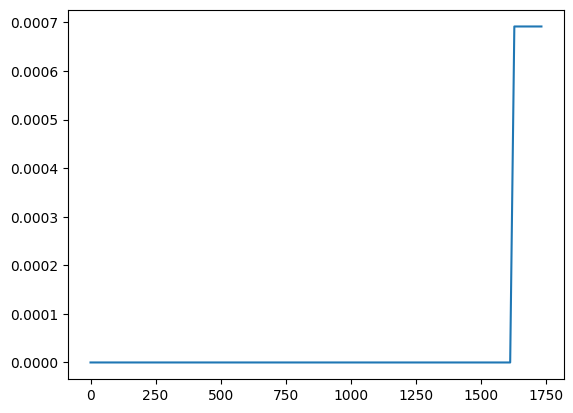

In [16]:
data_all=[]
data_t = []
data = get_traces(smu)
data_all.append(data["reading"])
data_t.append(data["time"])
data_t_array = np.array(data_t[0])
data_all_array = np.array(data_all[0])
#data_t_array
#data_all

data_t_array = np.array(data_t[0])
data_all_array = np.array(data_all[0])
# da = da[1::]
plt.plot(data_t_array,data_all_array)


In [ ]:
I = np.array([])
for i in range(10):
        I = measure(I[i])
        I = np.append(I, [I])
print(I)
 

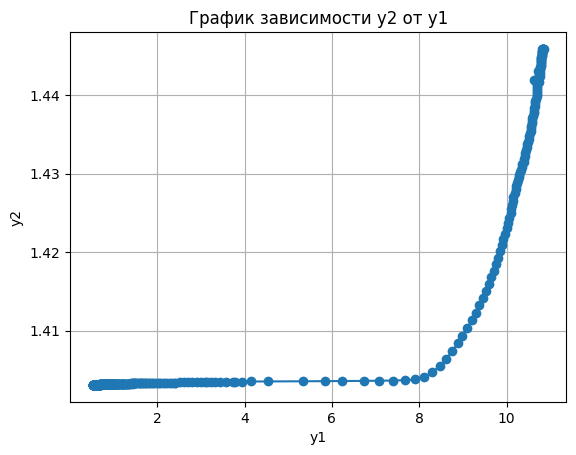

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файлов
# Предполагается, что каждый файл имеет две колонки: x и y
data1 = np.loadtxt('200s_data.txt', delimiter=';')  # Файл с данными x и y1
data2 = np.loadtxt('200s_V_I.txt', delimiter=';')  # Файл с данными x и y2

# Извлечение оси x и значений y1 и y2
x = data1[:, 1]
y1 = data1[:, 0]
y2 = data2[:, 1]

# Построение графика зависимости y2 от y1
plt.plot(y1, y2, marker='o', linestyle='-')
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('График зависимости y2 от y1')
plt.grid(True)
plt.show()

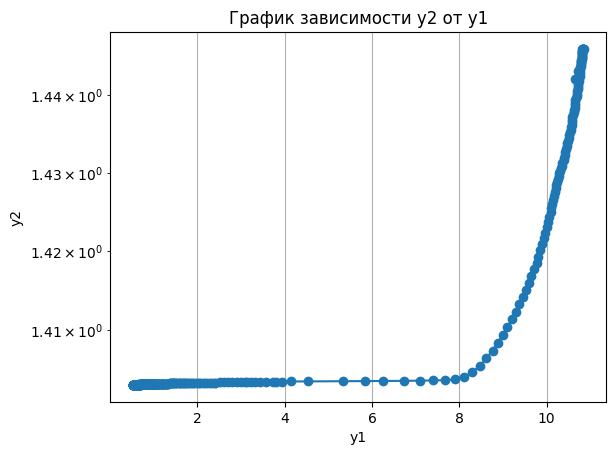

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файлов
# Предполагается, что каждый файл имеет две колонки: x и y
data1 = np.loadtxt('200s_data.txt', delimiter=';')  # Файл с данными x и y1
data2 = np.loadtxt('200s_V_I.txt', delimiter=';')  # Файл с данными x и y2

# Извлечение оси x и значений y1 и y2
x = data1[:, 1]
y1 = data1[:, 0]
y2 = data2[:, 1]

# Построение графика зависимости y2 от y1
plt.semilogy(y1, y2, marker='o', linestyle='-')
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('График зависимости y2 от y1')
plt.grid(True)
plt.show()